In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import funcoes as fc
import numpy as np

In [2]:
diretorio = f'../data/'
diretorio

'../data/'

In [3]:
arquivo = os.listdir(diretorio)[0]

In [4]:
tabela1 = pd.read_excel(diretorio + arquivo, 'DRE')

In [5]:
dados_filtrados, tabela2, novas_colunas = fc.filtrar_tabela(tabela1)

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['Descricao'] = tabela['Descricao'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)


In [6]:
lucro_liquido = fc.funcao_lucro_liquido(tabela2, novas_colunas)

Lucro Líquido por Trimestre: {'1T24': 23810, '4T23': 31163, '1T23': 38307}


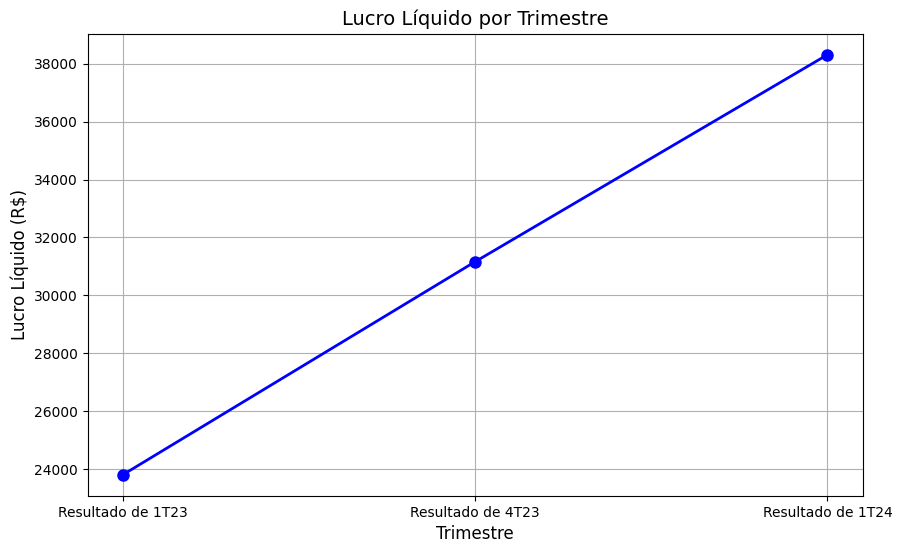

In [7]:
lucro_liquido = {
    novas_colunas[1]: lucro_liquido[novas_colunas[1]],
    novas_colunas[2]: lucro_liquido[novas_colunas[2]],
    novas_colunas[3]: lucro_liquido[novas_colunas[3]]
}

# Extrair trimestres e valores
trimestres = list(lucro_liquido.keys())[::-1]  # Inverter trimestres
lucros = list(lucro_liquido.values())  # Manter os valores na mesma ordem

# Mapear os trimestres para um formato descritivo
trimestres_descritivos = [f"Resultado de {t}" for t in trimestres]

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(trimestres_descritivos, lucros, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adicionar título e rótulos aos eixos
plt.title('Lucro Líquido por Trimestre', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Lucro Líquido (R$)', fontsize=12)

# Adicionar grade e exibir o gráfico
plt.grid(True)
plt.show()

In [8]:
preco_medio_acoes = fc.calcular_preco_medio(novas_colunas[1:])

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:65: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dados_historicos['Trimestre'] = dados_historicos.index.to_period('Q')


In [9]:
lucro_liquido_lista = list(lucro_liquido.values())

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:65: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dados_historicos['Trimestre'] = dados_historicos.index.to_period('Q')


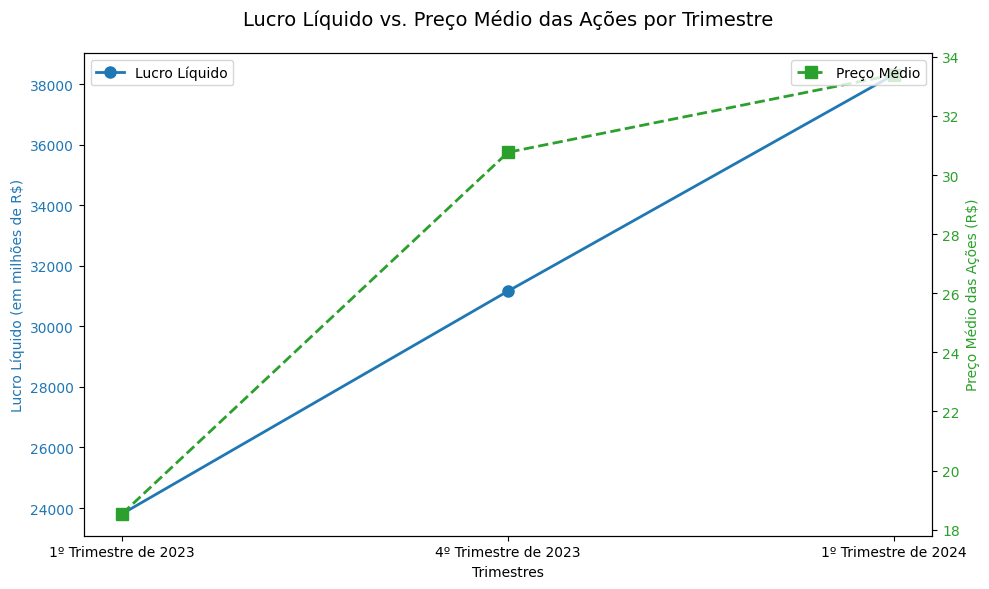

In [10]:
# Dados
trimestres = ["1º Trimestre de 2023", "4º Trimestre de 2023", "1º Trimestre de 2024"]
lucro_liquido = lucro_liquido_lista # Em milhões de reais
preco_medio_acoes = fc.calcular_preco_medio(novas_colunas[1:])
preco_medio_acoes = preco_medio_acoes.tolist() if isinstance(preco_medio_acoes, np.ndarray) else preco_medio_acoes

# Criar figura e eixo
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eixo Y para lucro líquido
color = 'tab:blue'
ax1.set_xlabel('Trimestres')
ax1.set_ylabel('Lucro Líquido (em milhões de R$)', color=color)
ax1.plot(trimestres, lucro_liquido, marker='o', color=color, label="Lucro Líquido", linewidth=2, markersize=8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left")

# Eixo Y para preço médio das ações
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Preço Médio das Ações (R$)', color=color)
ax2.plot(trimestres, preco_medio_acoes, marker='s', linestyle='--', color=color, label="Preço Médio", linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper right")

# Título e layout
plt.title("Lucro Líquido vs. Preço Médio das Ações por Trimestre", fontsize=14, pad=20)
fig.tight_layout()
plt.show()